# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Ricardo Barros Pereira   | RM 339151      | `15IA` |
| Gabriel O'Donnell Cabral | RM 338420      | `15IA` |
| Rafael Diogo Rossetti    | RM 338058      | `15IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**:

Bacteria: 2780;
Controle: 1583;
Viral: 1493;

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications import InceptionResNetV2
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.inception_resnet_v2 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [4]:
try:
    os.mkdir('raiox/controle')
    os.mkdir('raiox/bacteria')
    os.mkdir('raiox/viral')
except:
    print("Diretório existente")

Diretório existente


In [30]:
diretorio = ['base/test','base/train','base/val']

for pasta in diretorio:
    d_normal = os.listdir(pasta + '/NORMAL')
    d_pneumonia = os.listdir(pasta + '/PNEUMONIA')

    for arquivo in d_normal:
        if "virus" in arquivo:
            shutil.copy(pasta + '/NORMAL/' + arquivo, 'raiox/viral')
        elif "bacteria" in arquivo:
            shutil.copy(pasta + '/NORMAL/' + arquivo, 'raiox/bacteria')
        else:
            shutil.copy(pasta + '/NORMAL/' + arquivo, 'raiox/controle')        
    for arquivo in d_pneumonia:
        if "virus" in arquivo:
            shutil.copy(pasta + '/PNEUMONIA/' + arquivo, 'raiox/viral')  
        elif "bacteria" in arquivo:
            shutil.copy(pasta + '/PNEUMONIA/' + arquivo, 'raiox/bacteria')
        else:
            shutil.copy(pasta + '/PNEUMONIA/' + arquivo, 'raiox/controle')
    print(pasta + ' finalizado')
    
        
    

    
    

base/test finalizado
base/train finalizado
base/val finalizado


In [2]:
## IMPLEMENTE
divisao_treino_validacao = 0.30

In [3]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 4101 images belonging to 3 classes.


In [4]:
val_generator = train_datagen.flow_from_directory(
    "raiox",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 1755 images belonging to 3 classes.


In [5]:
train_generator.class_indices, val_generator.class_indices

({'bacteria': 0, 'controle': 1, 'viral': 2},
 {'bacteria': 0, 'controle': 1, 'viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [6]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

ResNet é uma rede neural classica utilizada em muitos projetos de visão computacional. Ela trouxe um grande avanço ao permitir treinamentos com 152 camadas, já para esta analise é utilizado ResNet50, que é uma versão mais simples desta arquitetura.

A arquitetura do ResNet50 tem 4 estágios, e a rede pode utilizar uma imagem de entrada com altura e largura em multiplos de 32, e 3 como largura do canal.

Como veremos no diagrama abaixo, o estário 1 possui 3 blocos residuais contendo 3 camadas cada, o tamanho dos kernels usados para realizar a operação de convolução em todas as 3 camadas do bloco do estágio 1 são 64, 64 e 128 respectivamente.

As setas curvas referem-se à conexão de identidade. A seta tracejada conectada representa que a operação de convolução no Bloco Residual é realizada com o passo 2, portanto, o tamanho da entrada será reduzido à metade em termos de altura e largura, mas a largura do canal será duplicada. À medida que avançamos de um estágio para outro, a largura do canal é duplicada e o tamanho da entrada é reduzido à metade.

<p align="center">
    <img src="imagens/ResNet50_architecture-1.jpg">
</p>

ResNet50 performa muito bem em casos de analises clinicas, e pode ser utilizado por exemplo em projetos para reconhecimento de cancer de pele. 

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [7]:
## IMPLEMENTE

qtde_classes = 3

In [38]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 18s 0us/step


In [39]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [40]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [12]:
## IMPLEMENTE

qtde_epocas = 15

In [48]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/15
5/5 [==============================] - 75s 17s/step - loss: 0.5272 - precision_score: 0.8109 - recall_score: 0.7750 - f1_score: 0.7924 - val_loss: 0.7157 - val_precision_score: 0.7400 - val_recall_score: 0.6938 - val_f1_score: 0.7160
Epoch 2/15
5/5 [==============================] - 63s 14s/step - loss: 0.5515 - precision_score: 0.7681 - recall_score: 0.7188 - f1_score: 0.7422 - val_loss: 0.6626 - val_precision_score: 0.7606 - val_recall_score: 0.6687 - val_f1_score: 0.7111
Epoch 3/15
5/5 [==============================] - 62s 14s/step - loss: 0.4952 - precision_score: 0.8014 - recall_score: 0.7563 - f1_score: 0.7781 - val_loss: 0.5756 - val_precision_score: 0.7972 - val_recall_score: 0.7437 - val_f1_score: 0.7694
Epoch 4/15
5/5 [==============================] - 61s 13s/step - loss: 0.5376 - precision_score: 0.7982 - recall_score: 0.7625 - f1_score: 0.7797 - val_loss: 0.5808 - val_precision_score: 0.7745 - val_recall_score: 0.7188 - val_f1_score: 0.7446
Epoch 5/15
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

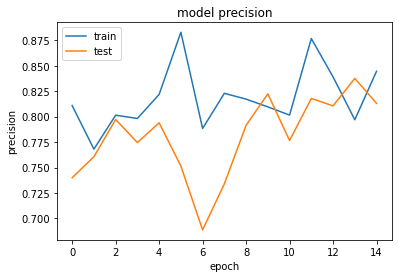

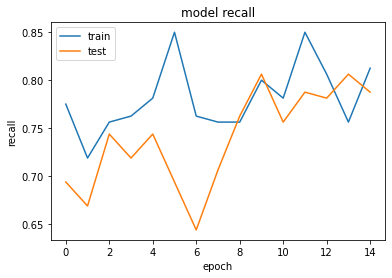

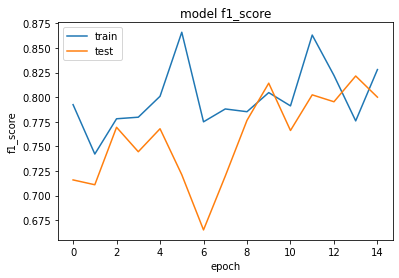

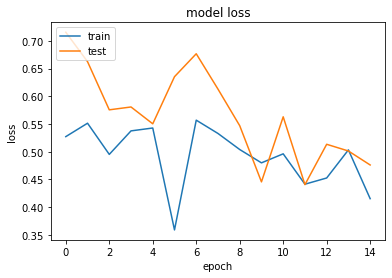

In [49]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: O modelo está convergendo rasoavelmente bem, pois de acordo com os gráficos podemos observar a perda (loss) em descendente, e a precisão (precision), sensibilidade (recall) e pontuação (f1 score) em ascendente, porém com resultados que variam bastante.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: A precisão foi de 81,31% , a sensibilidade foi de 78,75% e a validação de 80%.

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

VGG16 é considerada das melhores arquiteturas de modelo de visão. Uma caracteristica unica sobre ela é que não possui um grande numero de hiperparametros, e sim em camadas de 3x3 e sempre utilizando o mesmo preenchimento de camada de 2x2. Ela segue este mesmo arranjo de forma consistente em toda sua arquitetura. No final ela possui 2 camadas super conectadas.

Esta rede possui aproximadamente 138 milhões de parametros e 16 camadas

<p><img src="imagens/vgg16.png" alt="vgg16"/></p>

Um exemplo de caso de uso onde a arquitetura VGG16 tem uma boa performance é na comparação de gatos e cachorros.

In [16]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [51]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [52]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [53]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/15
5/5 [==============================] - 204s 44s/step - loss: 1.9128 - precision_score: 0.3981 - recall_score: 0.3696 - f1_score: 0.3828 - val_loss: 1.3351 - val_precision_score: 0.5863 - val_recall_score: 0.5625 - val_f1_score: 0.5740
Epoch 2/15
5/5 [==============================] - 208s 45s/step - loss: 1.3814 - precision_score: 0.6610 - recall_score: 0.6326 - f1_score: 0.6463 - val_loss: 0.9547 - val_precision_score: 0.7185 - val_recall_score: 0.7063 - val_f1_score: 0.7123
Epoch 3/15
5/5 [==============================] - 196s 44s/step - loss: 1.0880 - precision_score: 0.7066 - recall_score: 0.6762 - f1_score: 0.6909 - val_loss: 1.0846 - val_precision_score: 0.6804 - val_recall_score: 0.6500 - val_f1_score: 0.6647
Epoch 4/15
5/5 [==============================] - 189s 42s/step - loss: 0.9920 - precision_score: 0.6517 - recall_score: 0.6474 - f1_score: 0.6495 - val_loss: 1.3493 - val_precision_score: 0.5952 - val_recall_score: 0.5875 - val_f1_score: 0.5913
Epoch 5/15
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

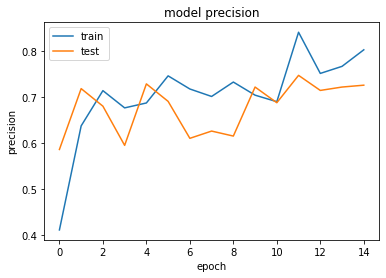

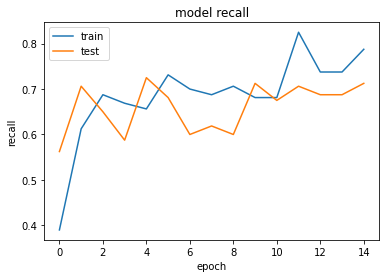

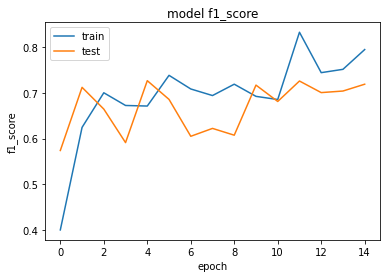

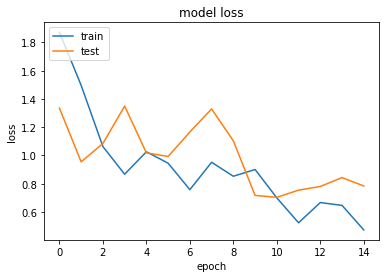

In [54]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: O modelo mostrou uma boa convergencia, com tentencia de subida para precisão, sensibilidade e validação e tendencia de queda na perda, o que é bastante positivo.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: A precisão foi de 72,60% , a sensibilidade foi de 71,25% e a validação de 71,91%.

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:
VGG19 consiste em 19 camadas, sendo 16 camadas de convolução, 3 camadas totalmente conectadas. Foi treinada para reconhecimento de 1000 objetos diferentes e pode ser utilizada para reconhecimento facial.

<p><img src="imagens/vgg19.png" /></p>

In [55]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 47s 1us/step


In [56]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [57]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [58]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/15
5/5 [==============================] - 186s 41s/step - loss: 2.2894 - precision_score: 0.4278 - recall_score: 0.4107 - f1_score: 0.4187 - val_loss: 1.2909 - val_precision_score: 0.6457 - val_recall_score: 0.6250 - val_f1_score: 0.6350
Epoch 2/15
5/5 [==============================] - 184s 41s/step - loss: 0.9907 - precision_score: 0.6812 - recall_score: 0.6490 - f1_score: 0.6646 - val_loss: 1.2912 - val_precision_score: 0.7068 - val_recall_score: 0.6875 - val_f1_score: 0.6969
Epoch 3/15
5/5 [==============================] - 184s 41s/step - loss: 1.2243 - precision_score: 0.6461 - recall_score: 0.6272 - f1_score: 0.6364 - val_loss: 0.9756 - val_precision_score: 0.6743 - val_recall_score: 0.6500 - val_f1_score: 0.6618
Epoch 4/15
5/5 [==============================] - 185s 42s/step - loss: 0.8802 - precision_score: 0.6735 - recall_score: 0.6378 - f1_score: 0.6552 - val_loss: 1.0052 - val_precision_score: 0.6990 - val_recall_score: 0.6812 - val_f1_score: 0.6899
Epoch 5/15
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

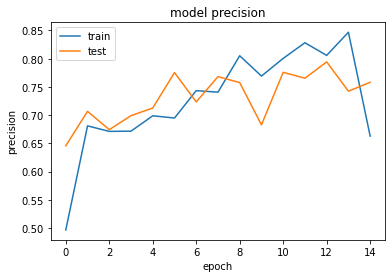

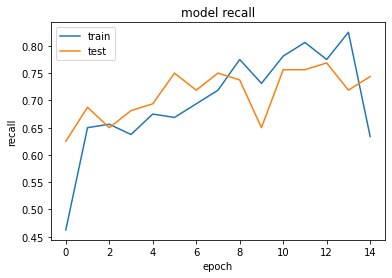

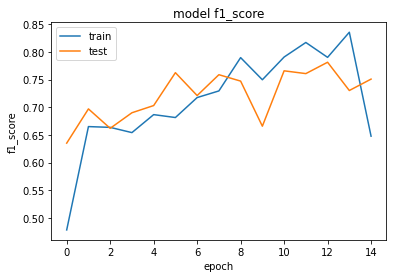

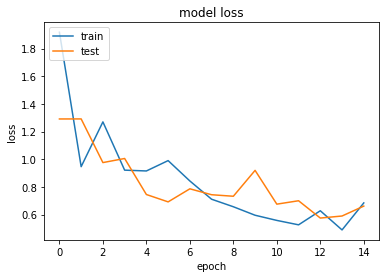

In [59]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: O modelo mostrou uma tendencia de subida para precisão, sensibilidade e validação, caindo apenas na decima quinta época dos dados de treino. A perda também mostrou uma tendencia de caida, tendo uma leve subida na ultima época.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: A precisão foi de 75,82% , a sensibilidade foi de 74,13% e a validação de 75,08%.

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 81,31 %     | 78,75 %          | 80,00 %     |
| VGG16    | 72,60 %     | 71,25 %          | 71,91 %     |
| VGG19    | 75,82 %     | 74,13 %          | 75,08 %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**:

O modelo ResNet50 foi o que trouxe melhores resultados diante dos outros modelos comparados, podemos ver que a porcentagem de precião e também de f1 score ficaram acima dos 80%, trazendo mais confiabilidade para este modelo para esta analise em especifico. A maior quantidade de camadas e o fato de as imagens serem em tons de cinza podem ter cooperado para esta performance.

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [8]:
#IMPLEMENTE

conv_base = InceptionResNetV2(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [9]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [13]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

C:\Users\ricar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 122s 21s/step - loss: 478.7305 - precision_score: 0.3484 - recall_score: 0.3484 - f1_score: 0.3484 - val_loss: 684.0106 - val_precision_score: 0.4437 - val_recall_score: 0.4437 - val_f1_score: 0.4437
Epoch 2/15
5/5 [==============================] - 75s 17s/step - loss: 524.3838 - precision_score: 0.4739 - recall_score: 0.4739 - f1_score: 0.4739 - val_loss: 118.3649 - val_precision_score: 0.4500 - val_recall_score: 0.4500 - val_f1_score: 0.4500
Epoch 3/15
5/5 [==============================] - 82s 18s/step - loss: 163.0374 - precision_score: 0.3702 - recall_score: 0.3702 - f1_score: 0.3702 - val_loss: 94.0661 - val_precision_score: 0.5562 - val_recall_score: 0.5562 - val_f1_score: 0.5562
Epoch 4/15
5/5 [==============================] - 95s 22s/step - loss: 105.0091 - precision_score: 0.4831 - recall_score: 0.4831 - f1_score: 0.4831 - val_loss: 51.5501 - val_precision_score: 0.2250 - val_recall_score: 0.2250 - val_f1_score: 0.2250
Epoch

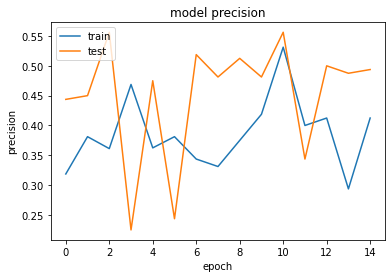

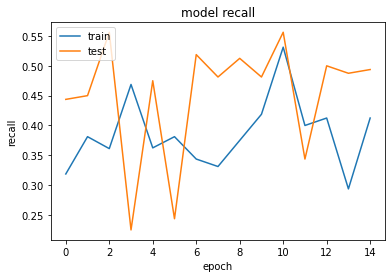

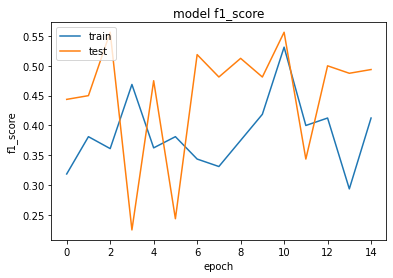

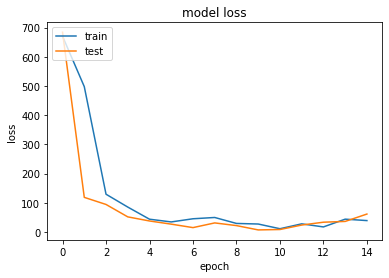

In [14]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**:

InceptionResNetv2 é uma rede neural convolucional que foi treinada com mais de 1 milhão de imagens do banco da dedados da ImageNet. Conta com 164 camadas e pode classificar 1000 categorias de objetos.

Tabela comparativa de resultados incluindo a abordagem extra InceptionResNetV2:

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 81,31 %     | 78,75 %          | 80,00 %     |
| VGG16    | 72,60 %     | 71,25 %          | 71,91 %     |
| VGG19    | 75,82 %     | 74,13 %          | 75,08 %     |
| InceptionResNetV2 | 49,38 % | 49,38 % | 49,37 %

A performance do modelo Inception ResNet-V2 foi a pior entre os quatro modelos restantes, apenas os dados de perda se mantiveram em constante queda através das épocas, mostrando uma leve subida nas ultimas, porém os dados de precisão, sensibilidade e F1-Score ficaram bem abaixo dos outros 3 modelos. Apesar deste modelo possuir mais camadas, não é possivel concluir que este fator pudesse influenciar positivamente para todos os casos, uma optimização poderia trazer melhores resultados neste caso.